### Отчет по лабораторной работе №3: "Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных".

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.rows', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style='ticks')

In [2]:
data = pd.read_csv('лр3.csv')
data.head()

,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,...,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths
0,230399,OIE,-27.900000,30.800000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,17/08/2017,...,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,NaN,0.0,NaN,NaN
1,230381,OIE,54.837037,73.354155,Europe,Russian Federation,Omskaya Oblast,Novaya Stanica,Exact,16/08/2017,...,"domestic, swine",122.0,6.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2,230333,OIE,-21.077740,30.211620,Africa,Zimbabwe,Masvingo,Mwambe,Exact,16/08/2017,...,"domestic, cattle",1283.0,112.0,0.0,NaN,7.0,NaN,NaN,NaN,NaN
3,230396,OIE,-26.000000,28.300000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_020,Exact,15/08/2017,...,"wild, unspecified bird",NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN
4,230371,OIE,49.237900,17.700200,Europe,Czech Republic,Jihomoravsky,Hvozdná,Exact,15/08/2017,...,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(17008, 24)

In [4]:
data.dtypes

Id                      int64
source                 object
latitude              float64
longitude             float64
region                 object
country                object
admin1                 object
localityName           object
localityQuality        object
observationDate        object
reportingDate          object
status                 object
disease                object
serotypes              object
speciesDescription     object
sumAtRisk             float64
sumCases              float64
sumDeaths             float64
sumDestroyed          float64
sumSlaughtered        float64
humansGenderDesc       object
humansAge             float64
humansAffected        float64
humansDeaths          float64
dtype: object

In [5]:
data.isnull().sum()

Id                        0
source                    0
latitude                  0
longitude                 0
region                    0
country                   0
admin1                    0
localityName              0
localityQuality           0
observationDate         502
reportingDate             0
status                    0
disease                   0
serotypes              6941
speciesDescription     1648
sumAtRisk              7251
sumCases               2473
sumDeaths              2840
sumDestroyed           4003
sumSlaughtered         4773
humansGenderDesc      16648
humansAge             15940
humansAffected        15591
humansDeaths          16557
dtype: int64

### анализ данных датасета

In [6]:
# удаление колонок с пропусками в больше 70 процентов
data = data.drop(columns=['humansGenderDesc', 'humansAge', 'humansAffected', 'humansDeaths'])
data.isnull().sum()

Id                       0
source                   0
latitude                 0
longitude                0
region                   0
country                  0
admin1                   0
localityName             0
localityQuality          0
observationDate        502
reportingDate            0
status                   0
disease                  0
serotypes             6941
speciesDescription    1648
sumAtRisk             7251
sumCases              2473
sumDeaths             2840
sumDestroyed          4003
sumSlaughtered        4773
dtype: int64

In [7]:
# нахождение колонок с нулевыми значениями
colnull = []
for col in data.columns:
    null_count = data[col].isnull().sum()
    if data[col].dtype in ('float64', 'int64') and null_count != 0:
        colnull.append(col)
        
print('колонки с нулевыми значениями:', colnull)

колонки с нулевыми значениями: ['sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered']


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [9]:
# заполнение пустых числовых колонок с помощью медианы
for col in colnull:
    i = MissingIndicator()
    miss = i.fit_transform(data[[col]])
    med = SimpleImputer(strategy='median')
    data[[col]] = med.fit_transform(data[[col]])

In [10]:
data.isnull().sum()

Id                       0
source                   0
latitude                 0
longitude                0
region                   0
country                  0
admin1                   0
localityName             0
localityQuality          0
observationDate        502
reportingDate            0
status                   0
disease                  0
serotypes             6941
speciesDescription    1648
sumAtRisk                0
sumCases                 0
sumDeaths                0
sumDestroyed             0
sumSlaughtered           0
dtype: int64

In [11]:
# удаление ненужных для анализа категориальных колонок
data = data.drop(columns=['observationDate', 'reportingDate', 'speciesDescription'])
# заполнение пустых значений в категориальных данных
cat_colnull = []
for col in data.columns:
    null_count = data[col].isnull().sum()
    if data[col].dtype not in ('float64', 'int64') and null_count != 0:
        cat_colnull.append(col)
        
print('категориальные колонки с нулевыми значениями:', cat_colnull)

категориальные колонки с нулевыми значениями: ['serotypes']


In [12]:
# заполнение пустых значений в категориальных колонках с помощью моды
for col in cat_colnull:
    i = MissingIndicator()
    miss = i.fit_transform(data[[col]])
    mod = SimpleImputer(strategy='most_frequent')
    data[[col]] = mod.fit_transform(data[[col]])

In [13]:
data.isnull().sum()

Id                 0
source             0
latitude           0
longitude          0
region             0
country            0
admin1             0
localityName       0
localityQuality    0
status             0
disease            0
serotypes          0
sumAtRisk          0
sumCases           0
sumDeaths          0
sumDestroyed       0
sumSlaughtered     0
dtype: int64

### преобразование категориальных признаков в числовые

In [14]:
cat_coll = []
for col in data.columns:
    if data[col].dtype == 'object':
        cat_coll.append(col)
for col in cat_coll:
    print(col, len(data[col].unique()))

source 12
region 4
country 122
admin1 941
localityName 9279
localityQuality 5
status 2
disease 26
serotypes 60


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# использование готового класса для кодирования
en_cat = {}
for col in cat_coll:
    le = LabelEncoder()
    # заполнение и преобразование
    data[[col]] = le.fit_transform(data[col])  
    print(col, data[col].unique())
    en_cat[col] = le

source [ 7  6  1 10  2  4  0  5  8  9 11  3]
region [0 3 2 1]
country [ 99  93 121  27 113 102  88  52 103  61  53  23  43  80  92  94 111  87
 105  79  41  24 107  68 100  64  84  34  89 101 116   8 118  36  56  48
  29   0  32  62 108  91 114 119  70  65  35  63  90  82 104  75 117  95
 110 109   7  73  46  16  97 120  45   1  30  31  15   2  83  54  74  98
  12  55  25  13   5  19  81  96  51  39 112  66  47  49  22  18  76  58
 115  26  85   9  40  42  11  44  78  86  60  38  72  28  33  17 106  50
  20  14   6  69   3  59  77  57  67   4  71  37  21  10]
admin1 [427 577 485 248 342 192 360 448 456 628 512 813 865 392 680 924 901 703
 334 451 882 708 564 545 511 691 526 217 869 879 414 607 127 710 660 472
 218 686 884 671 802 583 915 712 492 167 742 632 145 646 554 805 578 709
 611 146 390 918 129 338 376  96  10 753 322 211 694 159 475 553  23   2
 672 416 134 282 727 278 285 453 760 930 330 191  67 585 287 791  59 551
  76 406 909  78  34 296 284 825 319 599 851 261 496 558 262 5

In [17]:
data.dtypes

Id                   int64
source               int64
latitude           float64
longitude          float64
region               int64
country              int64
admin1               int64
localityName         int64
localityQuality      int64
status               int64
disease              int64
serotypes            int64
sumAtRisk          float64
sumCases           float64
sumDeaths          float64
sumDestroyed       float64
sumSlaughtered     float64
dtype: object

In [18]:
# выполнение декодирования
en_cat

{'source': LabelEncoder(),
 'region': LabelEncoder(),
 'country': LabelEncoder(),
 'admin1': LabelEncoder(),
 'localityName': LabelEncoder(),
 'localityQuality': LabelEncoder(),
 'status': LabelEncoder(),
 'disease': LabelEncoder(),
 'serotypes': LabelEncoder()}

In [19]:
en_cat['region'].inverse_transform([0, 3, 2, 1])

array(['Africa', 'Europe', 'Asia', 'Americas'], dtype=object)

In [20]:
en_cat['source'].inverse_transform([7, 6, 1, 10, 2, 4, 0, 5, 8, 9, 11, 3])

array(['OIE', 'National authorities', 'FAO Field Officer', 'WHO',
       'FAO officer', 'International reference laboratory', 'EC',
       'National Institute for Communicable Diseases, NICD', 'Other',
       'Publications', 'sequence only', 'FAO-Report'], dtype=object)

### масштабирование

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [22]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['sumAtRisk']])

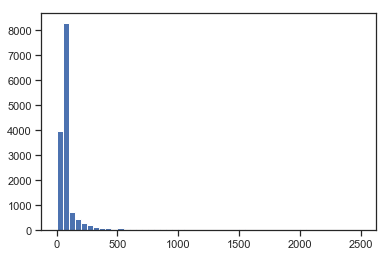

In [40]:
plt.hist(data['sumAtRisk'], 50, range=[0, 2500])
plt.show()

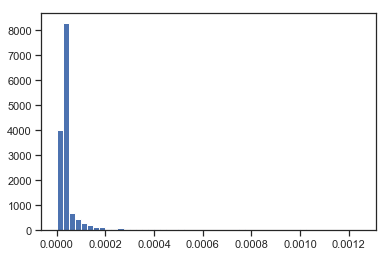

In [43]:
plt.hist(sc1_data, 50, range=[0, 0.00125])
plt.show()

In [59]:
# на основе z-оценки
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['sumAtRisk']])

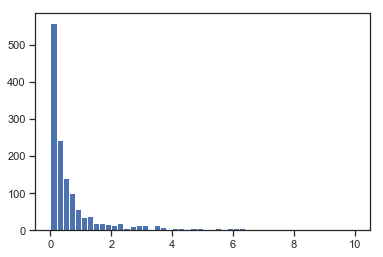

In [60]:
plt.hist(sc2_data, 50, range=[0, 10])
plt.show()

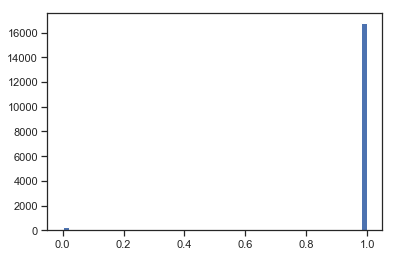

In [61]:
# нормализация
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['sumAtRisk']])
plt.hist(sc3_data, 50)
plt.show()